Question 1 - starts here

In [1]:
#importing all the necessary library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

In [2]:
#Question 1. Loading the dataset red-wine & #Display the tables in the imported data

df = pd.read_csv('red_wine.csv')
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [3]:
#Dislpay the size of the datafram
df.shape

(571, 4)

In [4]:
#Checking the data types of all variables in the dataframe
df.dtypes

citric acid    float64
sulphates      float64
alcohol        float64
type            object
dtype: object

In [5]:
#Question 1
#using pandas profiling to generates profile reports from a pandas DataFrame
#dashbard
import pandas_profiling as pp
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 Question 2 starts here
 Plotting the distribution for each of the input variables with respect to type quality

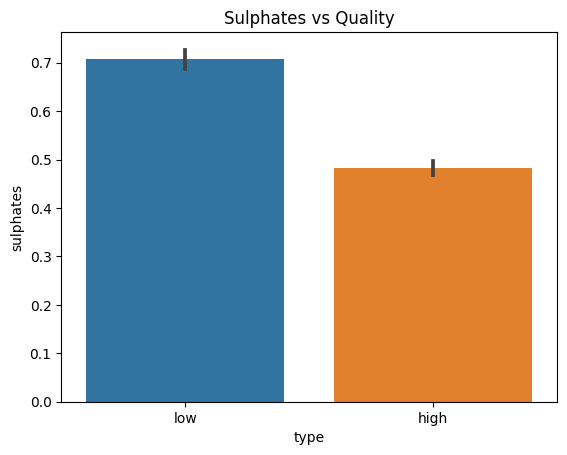

In [6]:
#Relationship between output variable and sulphates

sns.barplot(x='type', y='sulphates', data=df)
plt.title('Sulphates vs Quality')
plt.show()

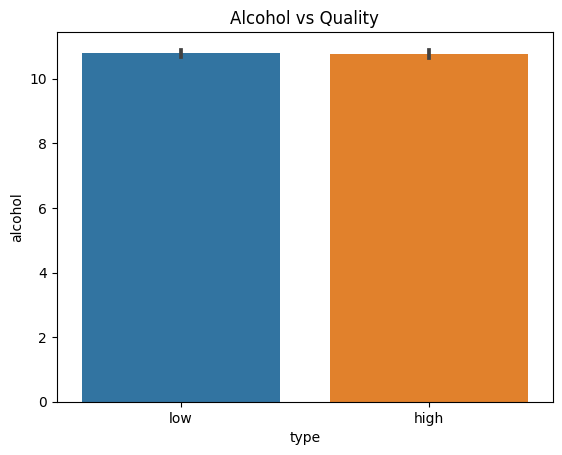

In [7]:
##Relationship between output variable and alcohol
sns.barplot(x='type', y='alcohol', data=df)
plt.title('Alcohol vs Quality')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='sulphates', ylabel='alcohol'>

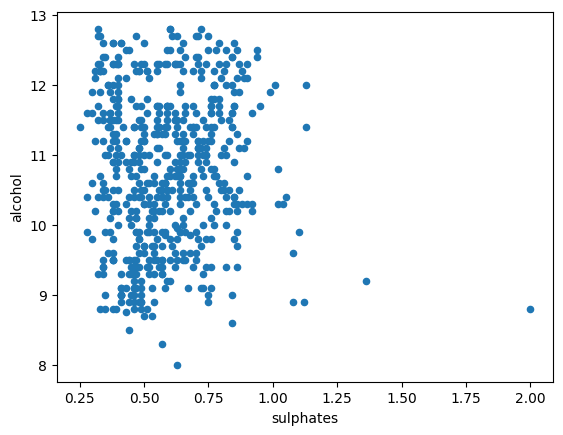

In [8]:
## Scater plot which shows relationship between alcohol and sulphates
df.plot(x='sulphates', y='alcohol', kind='scatter') 

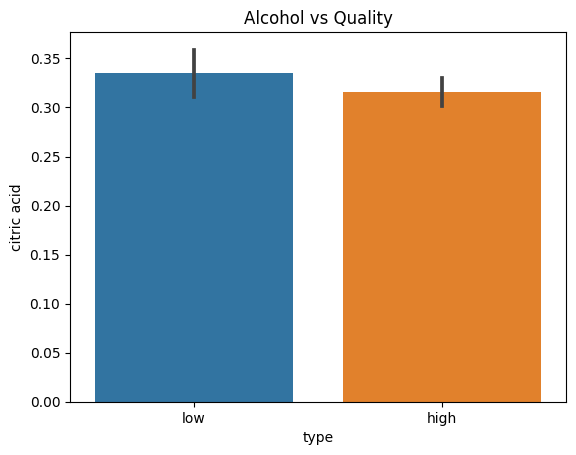

In [9]:
sns.barplot(x='type', y='citric acid', data=df)
plt.title('Alcohol vs Quality')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='sulphates', ylabel='type'>

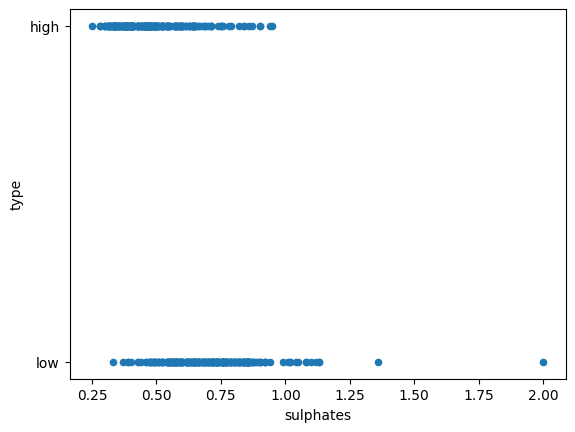

In [10]:
df.plot(x='sulphates', y='type', kind='scatter') 

<Axes: xlabel='alcohol', ylabel='type'>

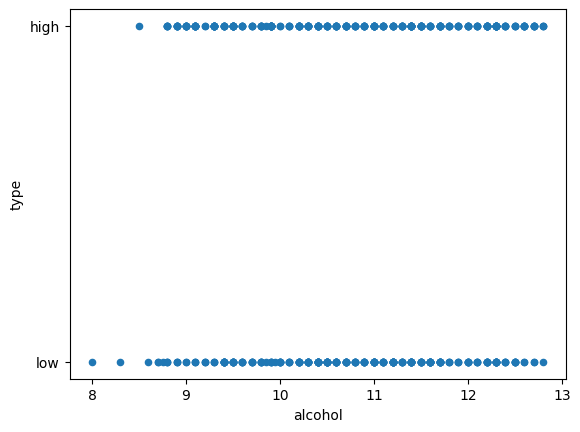

In [11]:
df.plot(x='alcohol', y='type', kind='scatter') 

In [12]:
# replacing values and converting categorical to numerical
df['type'].replace(['low', 'high'],
                        [0, 1], inplace=True)

<Axes: xlabel='type', ylabel='count'>

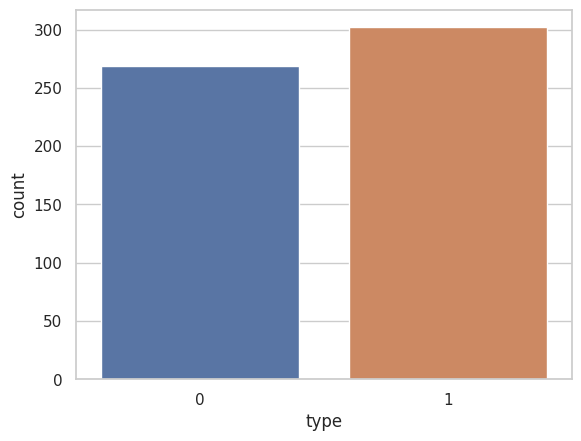

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.countplot(x=df["type"])

In [14]:
df.head(5)

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,0
1,0.66,0.57,8.3,0
2,0.23,0.44,8.5,1
3,0.44,0.84,8.6,0
4,0.08,0.50,8.7,0


In [15]:
corr_matrix = df.corr()
print(corr_matrix)

             citric acid  sulphates   alcohol      type
citric acid     1.000000   0.293009  0.097107 -0.056596
sulphates       0.293009   1.000000  0.049249 -0.593305
alcohol         0.097107   0.049249  1.000000 -0.006649
type           -0.056596  -0.593305 -0.006649  1.000000


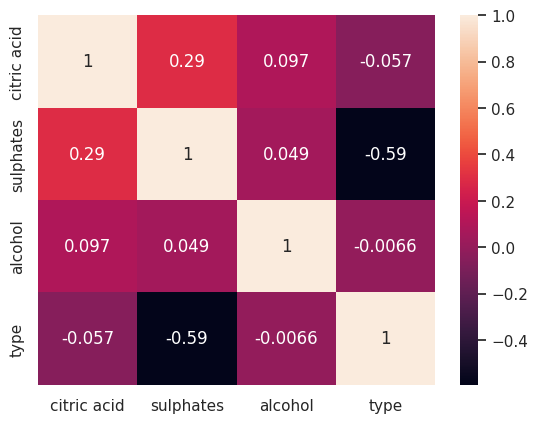

In [16]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

From the ablove distribution plot, scatter plot and correlation plot it is clear that sulphates is more predictive of the wine quality than alcohol. 


Question-3 Logistic regression

In [17]:
#Separating the dataset as response variable and feature variabls
df.columns
X = df.drop('type', axis=1)
y = df['type']

In [18]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
#Applying Standard scaling to get optimised result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
#Constructing a logistic regression model
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [27]:
#Prediction
y_pred=regressor.predict(X_test)

In [28]:
#Print confusion matrix and Accuracy Score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy' + str(regressor.score(X_test, y_test)))

[[65 22]
 [14 71]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        87
           1       0.76      0.84      0.80        85

    accuracy                           0.79       172
   macro avg       0.79      0.79      0.79       172
weighted avg       0.79      0.79      0.79       172

Accuracy0.7906976744186046


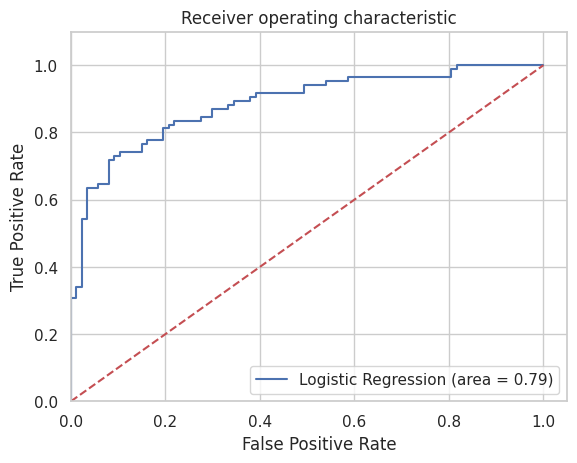

In [29]:
#ROC AUC curve for logistic regression
logit_roc_auc = roc_auc_score(y_test, regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Naive Bayes Theorem

In [30]:
#Training the Naive Bayes model on the training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred2  =  classifier.predict(X_test)

In [32]:
y_pred2 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [33]:
y_test

127    1
337    0
312    1
532    0
361    1
      ..
339    1
447    0
137    1
236    0
7      0
Name: type, Length: 172, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred2)
ac

0.8313953488372093

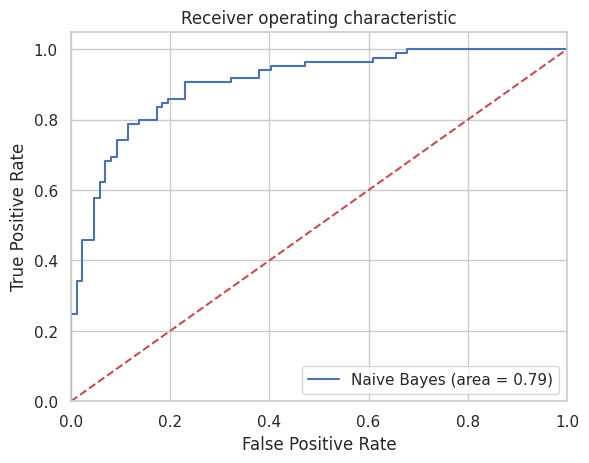

In [36]:
#ROC AUC curve for Naive bayes 
Naive_bayes_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naive_ROC')
plt.show()

Decision Tree

In [37]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred3))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        87
           1       0.75      0.85      0.80        85

    accuracy                           0.78       172
   macro avg       0.79      0.79      0.78       172
weighted avg       0.79      0.78      0.78       172

Accuracy: 0.7848837209302325


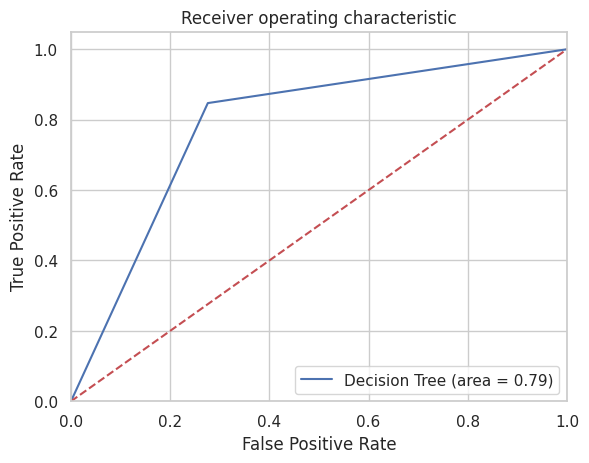

In [43]:
#ROC AUC curve for decision tree
naive_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier 


In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=1)
random_forest_classifier.fit(X_train, y_train)
y_pred4 = random_forest_classifier.predict(X_test)
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.86      0.77      0.81        87
           1       0.79      0.87      0.83        85

    accuracy                           0.82       172
   macro avg       0.82      0.82      0.82       172
weighted avg       0.82      0.82      0.82       172



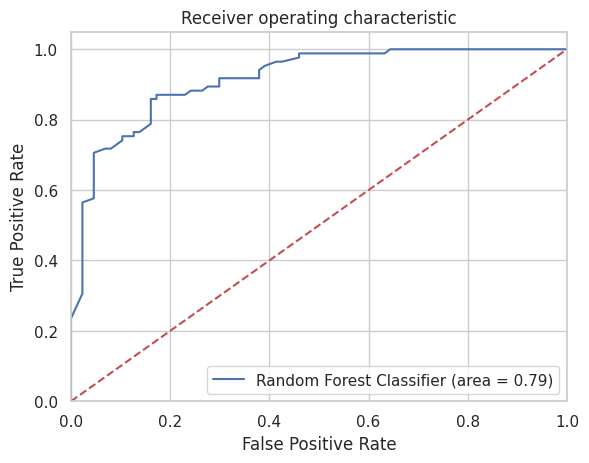

In [45]:
#ROC AUC curve for random forest
RF_auc = roc_auc_score(y_test, random_forest_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

Supprt Vector Machine- SVM

In [46]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test)

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7848837209302325


Comparison of all Model Accuracy score

In [48]:
from sklearn import metrics
models=['Logistic Regression','Naive Bayes','Decision Tree','Random Forest Classifier', 'Support Vector']
accuracy=[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,metrics.accuracy_score(y_test,j)))

Accuracy for Logistic Regression : 0.7906976744186046
Accuracy for Naive Bayes : 0.8313953488372093
Accuracy for Decision Tree : 0.7848837209302325
Accuracy for Random Forest Classifier : 0.8197674418604651
Accuracy for Support Vector : 0.7848837209302325


In [49]:
#random forest classifier roc_auc score
roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:,1])


0.9151453684922245

In [50]:
#decision tree  roc_auc score
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.7855983772819473

In [51]:
#logistic regression  roc_auc score
roc_auc_score(y_test, regressor.predict_proba(X_test)[:,1])

0.885057471264368

In [52]:
#naive bayes  roc_auc score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

0.9045300878972279

Question 4 Performing & Running the best model in white-wine.csv and reporting the AUC score

In [53]:
df2 = pd.read_csv('white_wine.csv')
df2.head()

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


In [54]:
#Separating the dataset as response variable and feature variabls
df2.columns
X = df2.drop('type', axis=1)
y = df2['type']

In [55]:
# replacing values and converting categorical to numerical
df['type'].replace(['low', 'high'],
                        [0, 1], inplace=True)

In [56]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
#Applying Standard scaling to get optimised result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=1)
random_forest_classifier.fit(X_train, y_train)
y_pred_new = random_forest_classifier.predict(X_test)
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

        high       0.92      0.92      0.92        13
         low       0.67      0.67      0.67         3

    accuracy                           0.88        16
   macro avg       0.79      0.79      0.79        16
weighted avg       0.88      0.88      0.88        16



In [59]:
#random forest classifier roc_auc score
roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:,1])

0.8717948717948718

In [61]:
from sklearn import metrics
models=['Random Forest Classifier']
accuracy=[y_pred_new]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,metrics.accuracy_score(y_test,j)))

Accuracy for Random Forest Classifier : 0.875


## Our top model performed well in the white wine data, as seen by the accuracy and auc scores mentioned above.

Question 5 

## The decision tree model is the one I favor using. In my opinion, the simplest model is the one that provides the most obvious route in terms of the classification process, which is what would be required in a situation like assessing wine quality. We can pick a model based on the business requirements. For instance, if a corporation requires a high accuracy model, random forest is unquestionably the way to go. Yet, given that one can easily see the trees, decision trees using this dataset are simple to understand and analyze.